# Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import ds_functions as ds
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_selection import chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import aux_functions as af
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

data1 = pd.read_csv('Datasets/heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
data2 = pd.read_csv('Datasets/qsar_oral_toxicity.csv', sep=';', decimal='.')

## Heart Failure Dataset

## Oral Toxicity Dataset

* ### Undersampling

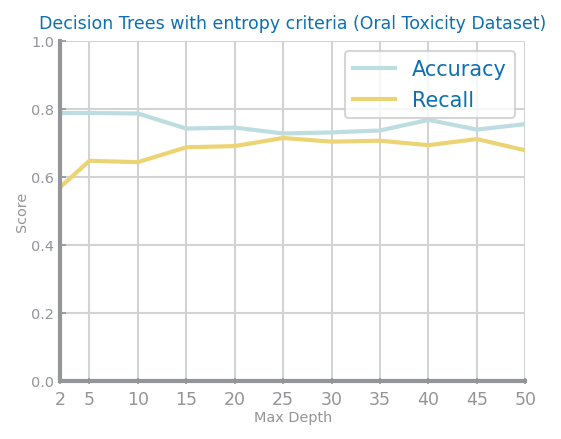

Best results achieved with gini criteria, depth=2 and min_impurity_decrease=0.00 ==> accuracy=0.93


In [56]:
ntests = 10

#min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

values = {}
acc = []
rec = []
for d in max_depths:
    tree = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=d, criterion='entropy', 
                                min_impurity_decrease=0.005, random_state=42)
    test_acc = 0
    test_rec = 0
    for n in range(ntests):
        data = data2.copy()
        # Cast target variable to binary
        data[data.columns[-1]] = (data[data.columns[-1]] == 'positive').astype(int)
        y: np.ndarray = data.pop(data.columns[-1]).values
        X: np.ndarray = data.values
        labels = pd.unique(y)

        trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
        trnX, trnY = af.balance_undersample(trnX, trnY)

        tree.fit(trnX, trnY)
        prdY = tree.predict(tstX)
        test_acc += metrics.accuracy_score(tstY, prdY)
        test_rec += metrics.recall_score(tstY, prdY)

    acc.append(test_acc/ntests)
    rec.append(test_rec/ntests)

    if yvalues[-1] > last_best:
        best = (f, d, imp)
        last_best = yvalues[-1]
        best_tree = tree

values['Accuracy'] = acc
values['Recall'] = rec
plt.figure()
ds.multiple_line_chart(max_depths, values, 
                       title='Decision Trees with entropy criteria (Oral Toxicity Dataset)',
                       xlabel='Max Depth', ylabel='Score', percentage=True)
plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'
      %(best[0], best[1], best[2], last_best))


* ### Oversampling

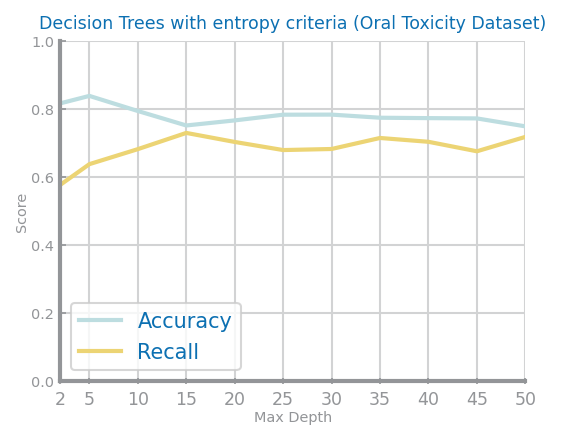

Best results achieved with gini criteria, depth=2 and min_impurity_decrease=0.00 ==> accuracy=0.93


In [59]:
ntests = 10

#min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

values = {}
acc = []
rec = []
for d in max_depths:
    tree = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=d, criterion='entropy', 
                                min_impurity_decrease=0.005, random_state=42)
    test_acc = 0
    test_rec = 0
    for n in range(ntests):
        data = data2.copy()
        # Cast target variable to binary
        data[data.columns[-1]] = (data[data.columns[-1]] == 'positive').astype(int)
        y: np.ndarray = data.pop(data.columns[-1]).values
        X: np.ndarray = data.values
        labels = pd.unique(y)

        trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
        trnX, trnY = af.balance_oversample(trnX, trnY)

        tree.fit(trnX, trnY)
        prdY = tree.predict(tstX)
        test_acc += metrics.accuracy_score(tstY, prdY)
        test_rec += metrics.recall_score(tstY, prdY)

    acc.append(test_acc/ntests)
    rec.append(test_rec/ntests)

    if yvalues[-1] > last_best:
        best = (f, d, imp)
        last_best = yvalues[-1]
        best_tree = tree

values['Accuracy'] = acc
values['Recall'] = rec
plt.figure()
ds.multiple_line_chart(max_depths, values, 
                       title='Decision Trees with entropy criteria (Oral Toxicity Dataset)',
                       xlabel='Max Depth', ylabel='Score', percentage=True)
plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'
      %(best[0], best[1], best[2], last_best))


* ### Undersampling w/ feature selection

.
.
.
.
.
.
.
.
.
.
.


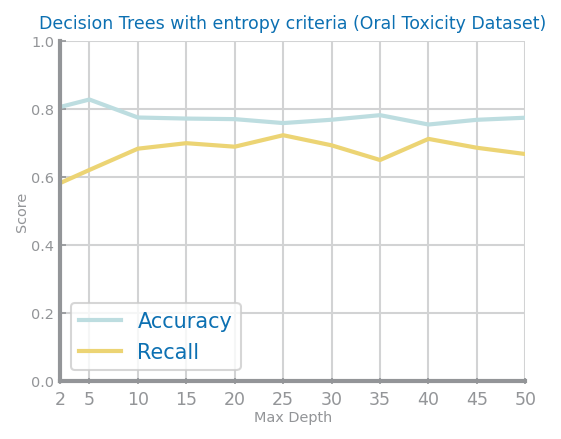

Best results achieved with  criteria, depth=0 and min_impurity_decrease=0.00 ==> accuracy=0.00


In [7]:
ntests = 10

#min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

data = data2.copy()
# Cast target variable to binary
data[data.columns[-1]] = (data[data.columns[-1]] == 'positive').astype(int)
X, y = af.best_feature_selection_data2(data)
labels = pd.unique(y)

values = {}
acc = []
rec = []
for d in max_depths:
    tree = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=d, criterion='entropy', 
                                min_impurity_decrease=0.005, random_state=42)
    test_acc = 0
    test_rec = 0
    for n in range(ntests):
        trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
        trnX, trnY = af.balance_undersample(trnX, trnY)

        tree.fit(trnX, trnY)
        prdY = tree.predict(tstX)
        test_acc += metrics.accuracy_score(tstY, prdY)
        test_rec += metrics.recall_score(tstY, prdY)

    print('.')
    acc.append(test_acc/ntests)
    rec.append(test_rec/ntests)

    '''if values[-1] > last_best:
        best = (f, d, imp)
        last_best = yvalues[-1]
        best_tree = tree'''

values['Accuracy'] = acc
values['Recall'] = rec
plt.figure()
ds.multiple_line_chart(max_depths, values, 
                       title='Decision Trees with entropy criteria (Oral Toxicity Dataset)',
                       xlabel='Max Depth', ylabel='Score', percentage=True)
plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'
      %(best[0], best[1], best[2], last_best))


* ### Testing for best depth and min_imp_dec (accuracy and recall)

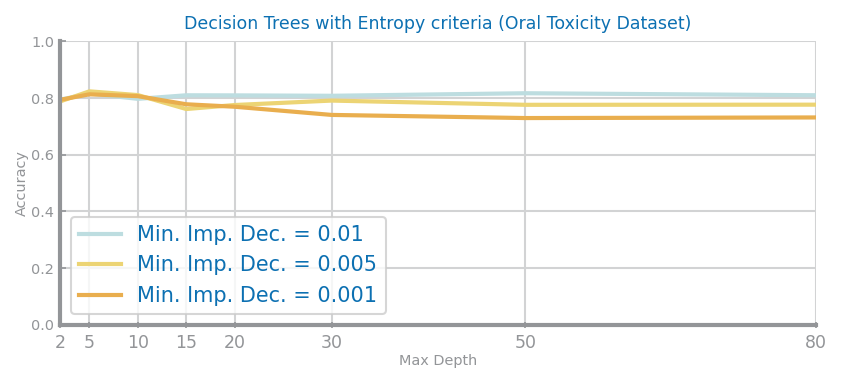

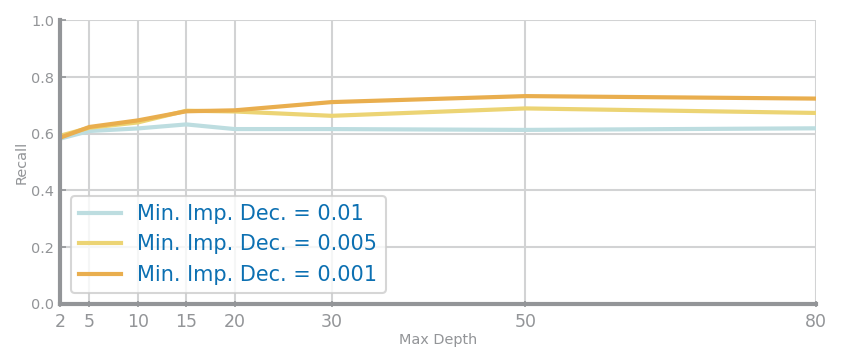

In [18]:
ntests = 20

data = data2.copy()
# Cast target variable to binary
data[data.columns[-1]] = (data[data.columns[-1]] == 'positive').astype(int)
X, y = af.best_feature_selection_data2(data)
labels = pd.unique(y)

min_impurity_decrease = [0.01, 0.005, 0.001]
max_depths = [2, 5, 10, 15, 20, 30, 50, 80]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

avalues = {}
rvalues = {}
for imp in min_impurity_decrease:
    acc = []
    rec = []
    for d in max_depths:
        tree = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=d, criterion='entropy', 
                                min_impurity_decrease=imp, random_state=10)
        test_acc = 0
        test_rec = 0
        for n in range(ntests):
            trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
            trnX, trnY = af.balance_undersample(trnX, trnY)

            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            test_acc += metrics.accuracy_score(tstY, prdY)
            test_rec += metrics.recall_score(tstY, prdY)

        acc.append(test_acc/ntests)
        rec.append(test_rec/ntests)

    avalues['Min. Imp. Dec. = ' + str(imp)] = acc
    rvalues['Min. Imp. Dec. = ' + str(imp)] = rec
        
# Accuracy      
plt.figure(figsize=(6.5,2.5))
ds.multiple_line_chart(max_depths, avalues, title='Decision Trees with Entropy criteria (Oral Toxicity Dataset)',
                           xlabel='Max Depth', ylabel='Accuracy', percentage=True)
plt.show()

# Recall
plt.figure(figsize=(6.5,2.5))
ds.multiple_line_chart(max_depths, rvalues,
                           xlabel='Max Depth', ylabel='Recall', percentage=True)

plt.show()

* ### Is overfitting? (min_imp_dec = 0.005)

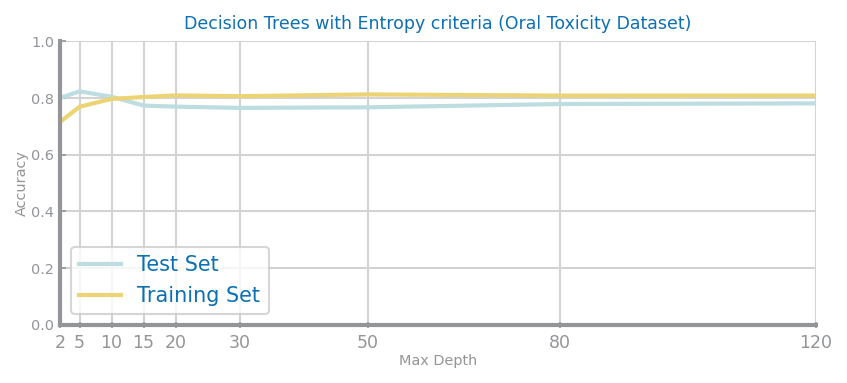

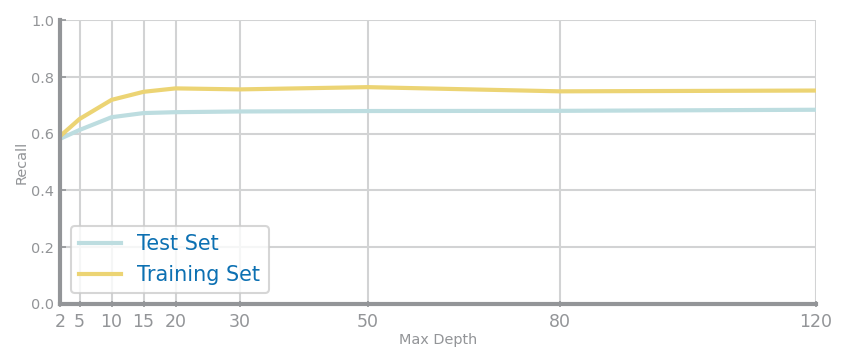

In [22]:
ntests = 20

data = data2.copy()
# Cast target variable to binary
data[data.columns[-1]] = (data[data.columns[-1]] == 'positive').astype(int)
X, y = af.best_feature_selection_data2(data)
labels = pd.unique(y)

min_impurity_decrease = [0.01, 0.005, 0.001]
max_depths = [2, 5, 10, 15, 20, 30, 50, 80, 120]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

avalues = {}
rvalues = {}

tstacc = []
tstrec = []
trnacc = []
trnrec = []
for d in max_depths:
    tree = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=d, criterion='entropy', 
                            min_impurity_decrease=0.005, random_state=10)
    curr_tstacc = 0
    curr_tstrec = 0
    curr_trnacc = 0
    curr_trnrec = 0
    for n in range(ntests):
        trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
        trnX, trnY = af.balance_undersample(trnX, trnY)

        tree.fit(trnX, trnY)
        prdY = tree.predict(tstX)
        curr_tstacc += metrics.accuracy_score(tstY, prdY)
        curr_tstrec += metrics.recall_score(tstY, prdY)
        
        prdY = tree.predict(trnX)
        curr_trnacc += metrics.accuracy_score(trnY, prdY)
        curr_trnrec += metrics.recall_score(trnY, prdY)

    tstacc.append(curr_tstacc/ntests)
    tstrec.append(curr_tstrec/ntests)
    
    trnacc.append(curr_trnacc/ntests)
    trnrec.append(curr_trnrec/ntests)

avalues['Test Set']     = tstacc
avalues['Training Set'] = trnacc

rvalues['Test Set']     = tstrec
rvalues['Training Set'] = trnrec
        
# Accuracy      
plt.figure(figsize=(6.5,2.5))
ds.multiple_line_chart(max_depths, avalues, title='Decision Trees with Entropy criteria (Oral Toxicity Dataset)',
                           xlabel='Max Depth', ylabel='Accuracy', percentage=True)
plt.show()

# Recall
plt.figure(figsize=(6.5,2.5))
ds.multiple_line_chart(max_depths, rvalues,
                           xlabel='Max Depth', ylabel='Recall', percentage=True)

plt.show()

* ### ROC chart for best

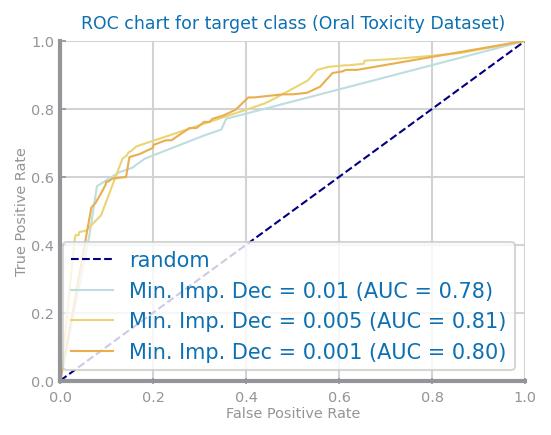

In [16]:
data = data2.copy()
# Cast target variable to binary
data[data.columns[-1]] = (data[data.columns[-1]] == 'positive').astype(int)
X, y = af.best_feature_selection_data2(data)
#y: np.ndarray = data.pop(data.columns[-1]).values
#X: np.ndarray = data.values
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y, random_state=100)
trnX, trnY = af.balance_undersample(trnX, trnY)

tree1 = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=30, criterion='entropy', 
                            min_impurity_decrease=0.01, random_state=42).fit(trnX, trnY)

tree2 = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=30, criterion='entropy', 
                            min_impurity_decrease=0.005, random_state=42).fit(trnX, trnY)

tree3 = DecisionTreeClassifier(min_samples_leaf=0.005, max_depth=30, criterion='entropy', 
                            min_impurity_decrease=0.001, random_state=42).fit(trnX, trnY)

plt.figure()
ds.plot_roc_chart({'Min. Imp. Dec = 0.01': tree1, 'Min. Imp. Dec = 0.005': tree2, 
                   'Min. Imp. Dec = 0.001': tree3}, tstX, tstY, target='target class (Oral Toxicity Dataset)')
plt.show()